In [1]:
import pandas as pd
import numpy as np
import my_net as mn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
rings_train = pd.read_csv("../data/classification/rings3-regular-training.csv")
rings_test = pd.read_csv("../data/classification/rings3-regular-test.csv")
easy_train = pd.read_csv("../data/classification/easy-training.csv")
easy_test = pd.read_csv("../data/classification/easy-test.csv")
xor_train = pd.read_csv("../data/classification/xor3-training.csv")
xor_test = pd.read_csv("../data/classification/xor3-test.csv")
easy_train["c"] = easy_train["c"].astype("int")
easy_test["c"] = easy_test["c"].astype("int")

rings_train_X = rings_train[["x", "y"]].values
rings_test_X = rings_test[["x", "y"]].values
rings_train_Y = rings_train[["c"]].values
rings_test_Y = rings_test[["c"]].values

easy_train_X = easy_train[["x", "y"]].values
easy_test_X = easy_test[["x", "y"]].values
easy_train_Y = easy_train[["c"]].values
easy_test_Y = easy_test[["c"]].values

xor_train_X = xor_train[["x", "y"]].values
xor_test_X = xor_test[["x", "y"]].values
xor_train_Y = xor_train[["c"]].values
xor_test_Y = xor_test[["c"]].values

In [3]:
encoder = OneHotEncoder(handle_unknown='ignore')
rings_train_Y_oh = encoder.fit_transform(rings_train[['c']]).toarray()
rings_test_Y_oh = encoder.fit_transform(rings_test[['c']]).toarray()

easy_train_Y_oh = encoder.fit_transform(easy_train[['c']]).toarray()
easy_test_Y_oh = encoder.fit_transform(easy_test[['c']]).toarray()

xor_train_Y_oh = encoder.fit_transform(xor_train[['c']]).toarray()
xor_test_Y_oh = encoder.fit_transform(xor_test[['c']]).toarray()

In [4]:
np.random.seed(21)

# easy

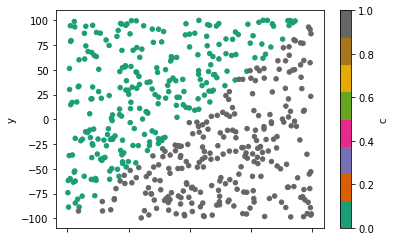

In [5]:
easy_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")

In [13]:
def softmax(a):
    expa = np.exp(a - np.max(a))
    return expa / expa.sum(axis=0, keepdims=True)
def softmax_prim(a):
    return softmax(a) * (1 - softmax(a))

In [21]:
softmax(np.array([1, 3, 4, 1])), softmax_prim(np.array([1, 3, 4, 1]))

(array([0.03392753, 0.25069239, 0.68145256, 0.03392753]),
 array([0.03277645, 0.18784571, 0.21707497, 0.03277645]))

In [9]:
net = mn.Net(2)
net.add(mn.DenseLayer(25, "sigmoid"))
net.add(mn.DenseLayer(2, "softmax"))
net.kernel_init("xavier")


mse, iters, mses_history = net.backpropagate(easy_train_X, easy_train_Y_oh, 
                               eta=0.001, n_epochs=3000,
                               required_loss=0, raporting_loss="cross-entropy",
                               verbose=3,
                               validation_input=easy_test_X, 
                               validation_output=easy_test_Y_oh, 
                               normalization_method=None
                              )


cross-entropy after 500 iterations (epoch 0): 4.999889391401893e-10
Absolute weights sum on 500 iteration (epoch 1): 
19.24, 18.52, 
cross-entropy after 1000 iterations (epoch 1): 13815.510557964273
Absolute weights sum on 1000 iteration (epoch 2): 
22.63, 36.82, 
cross-entropy after 1500 iterations (epoch 2): 4.999889391401893e-10
Absolute weights sum on 1500 iteration (epoch 3): 
51.56, 102.17, 
cross-entropy after 2000 iterations (epoch 3): 13815.510557964273
Absolute weights sum on 2000 iteration (epoch 4): 
153.79, 263.58, 
cross-entropy after 2500 iterations (epoch 4): 4.999889391401893e-10
Absolute weights sum on 2500 iteration (epoch 5): 
657.13, 694.45, 
cross-entropy after 3000 iterations (epoch 5): 13815.510557964273
Absolute weights sum on 3000 iteration (epoch 6): 
1843.08, 1880.06, 


/home/konrad/PycharmProjects/SomeNet/my_net.py:4: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda a: 1 / (1 + np.exp(-a))


cross-entropy after 3500 iterations (epoch 6): 4.999889391401893e-10
Absolute weights sum on 3500 iteration (epoch 7): 
5250.20, 5397.12, 
cross-entropy after 4000 iterations (epoch 7): 13815.510557964273
Absolute weights sum on 4000 iteration (epoch 8): 
27919.52, 14542.13, 
cross-entropy after 4500 iterations (epoch 8): 4.999889391401893e-10
Absolute weights sum on 4500 iteration (epoch 9): 
95425.33, 38638.50, 
cross-entropy after 5000 iterations (epoch 9): 13815.510557964273
Absolute weights sum on 5000 iteration (epoch 10): 
96223.77, 101366.03, 
cross-entropy after 5500 iterations (epoch 10): 4.999889391401893e-10
Absolute weights sum on 5500 iteration (epoch 11): 
2980734.18, 263532.25, 
cross-entropy after 6000 iterations (epoch 11): 13815.510557964273
Absolute weights sum on 6000 iteration (epoch 12): 
2980734.17, 680149.12, 
cross-entropy after 6500 iterations (epoch 12): 4.999889391401893e-10
Absolute weights sum on 6500 iteration (epoch 13): 
2980733.68, 1756993.63, 
cross-

cross-entropy after 28500 iterations (epoch 56): 4.999889391401893e-10
Absolute weights sum on 28500 iteration (epoch 57): 
15977291759055846303790333480318906925056.00, 9758658549658955567595520.00, 
cross-entropy after 29000 iterations (epoch 57): 13815.510557964273
Absolute weights sum on 29000 iteration (epoch 58): 
15977291759055846303790333480318906925056.00, 26887617921293840380067840.00, 
cross-entropy after 29500 iterations (epoch 58): 4.999889391401893e-10
Absolute weights sum on 29500 iteration (epoch 59): 
15977291759055846303790333480318906925056.00, 74084029697146620833955840.00, 
cross-entropy after 30000 iterations (epoch 59): 13815.510557964273
Absolute weights sum on 30000 iteration (epoch 60): 
15977291759055846303790333480318906925056.00, 204123839439690955346673664.00, 
cross-entropy after 30500 iterations (epoch 60): 4.999889391401893e-10
Absolute weights sum on 30500 iteration (epoch 61): 
15977291759055846303790333480318906925056.00, 562424331823172617630646272.

cross-entropy after 48000 iterations (epoch 95): 13815.510557964273
Absolute weights sum on 48000 iteration (epoch 96): 
1226273855220955845789239452988364165554254672319334640582468804286343020544.00, 1128907541896863480837943281901276063858688.00, 
cross-entropy after 48500 iterations (epoch 96): 4.999889391401893e-10
Absolute weights sum on 48500 iteration (epoch 97): 
1226273855220955845789239452988364165554254672319334640582468804286343020544.00, 3031745456255326868716742225770844728066048.00, 
cross-entropy after 49000 iterations (epoch 97): 13815.510557964273
Absolute weights sum on 49000 iteration (epoch 98): 
1226273855220955845789239452988364165554254672319334640582468804286343020544.00, 8142567765789984169747784121455535338815488.00, 
cross-entropy after 49500 iterations (epoch 98): 4.999889391401893e-10
Absolute weights sum on 49500 iteration (epoch 99): 
1226273855220955845789239452988364165554254672319334640582468804286343020544.00, 218683764877740701081056324585333524340

KeyboardInterrupt: 

# xor

In [ ]:
xor_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")

# rings

In [ ]:
rings_train.plot(kind="scatter", x = "x", y = "y", c = "c", colormap = "Dark2")
